[[0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 0 1 1 0 0 1 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


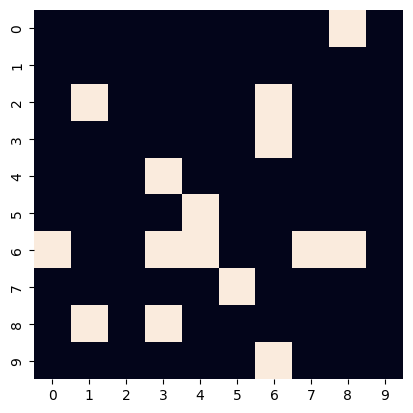

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import seaborn as sns

#red de Eros-Reynolds
# 1. Definir la red
# 2. Definir las condiciones iniciales
# 3. Denifinir los nodos

N = 10 #numero de nodos
k = 2 # conexiones promedio por nodo (max i N-1)
p = k/N #probabilidad de conexion

np.zeros((N,N)) #matriz de ceros
mat_C= bernoulli.rvs(p, size=(N,N)) #matriz de Bernoulli
np.fill_diagonal(mat_C, 0)#llenar la diagonal de ceros
sns.heatmap(mat_C, cbar=False, annot=False, square=True)#graficar la matriz

edge_list=[(u,v) for u,v in zip(*np.where(mat_C))] #lista de conexiones
print(mat_C)

adj_list ={ni:np.where(mat_C[ni])[0]  for ni in range(N)} #diccionario de nodos

def draw_edge(a, b, hw = 0):
    # Connects points a and b with an arrow: a-->b
    plt.arrow(a[0], a[1], b[0] - a[0], b[1] - a[1], 
              head_width = hw, length_includes_head = True, color="green"
              )
    
xy = np.random.random(size=(N,2)) #posiciones aleatorias de los nodos



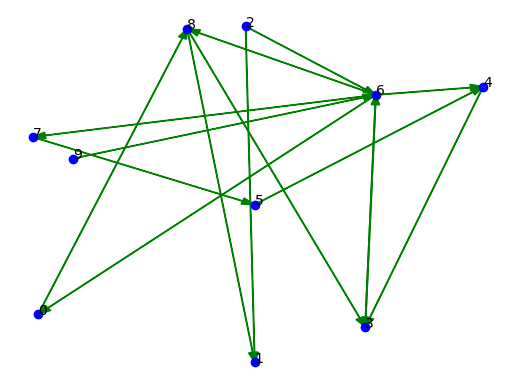

In [23]:
#grafica los nodos aleatorios
plt.plot(xy[:,0], xy[:,1], 'o', color="blue") #graficar los nodos
[plt.text(xy[i,0], xy[i,1], str(i)) for i in range(N)] #etiquetar los nodos
[draw_edge(xy[uv[0]], xy[uv[1]], hw=0.015) for uv in edge_list]; #graficar las conexiones
plt.axis('off'); #graficar una conexion

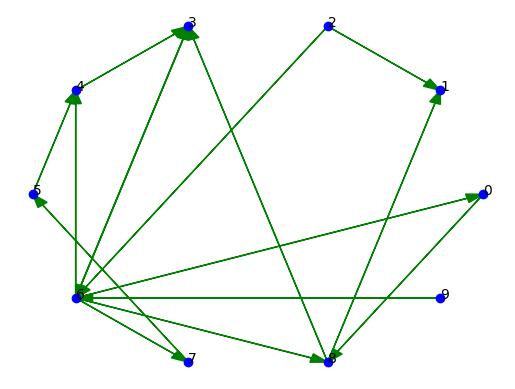

In [24]:
#grafica de nodos en circulo
angle = np.linspace(0, 2*np.pi, N, endpoint=False)
x= np.cos(angle)
y= np.sin(angle)

plt.plot(x, y, 'o', color="blue") #graficar los nodos
[plt.text(x[i], y[i], str(i)) for i in range(N)] #etiquetar los nodos
[draw_edge([x[uv[0]], y[uv[0]]], [x[uv[1]], y[uv[1]]], hw=0.05) for uv in edge_list]; #graficar las conexiones
plt.axis('off'); #graficar una conexion

(-1.1006601521621835,
 1.1006601521621835,
 -1.073662167924669,
 1.073662167924669)

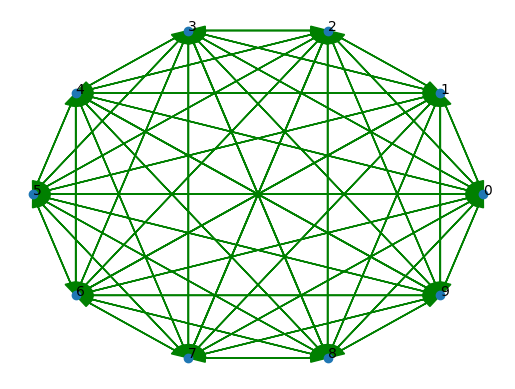

In [30]:
#grafica de nodos en circulo con conexiones aleatorias
k = 10
C = []
for u in range(N):
    C += [[]]
    for ki in range(k//2):
        C[u] += [u+ki+1, u-(ki+1)]
C = np.array(C)
C[np.where(C < 0)] += N
C[np.where(C >= N)] -= N
edge_list = []
for ni in range(N): 
    for v in C[ni]:
        edge_list += [(ni, v)]
edge_list
angle = np.linspace(0, 2*np.pi, 10, endpoint=False)
x = np.cos(angle)
y = np.sin(angle)
plt.plot(x, y, 'o')
[plt.text(x[i], y[i], str(i)) for i in range(N)];
[draw_edge((x[uv[0]], y[uv[0]]), (x[uv[1]], y[uv[1]]), hw=0.05) for uv in edge_list];
plt.axis('off')

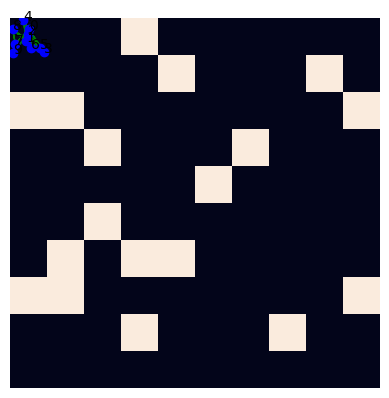

In [31]:
#realizar lo anterior para graficarlo en 2 dimensiones


